<center> 
    <h1>
        🏡 Melbourne House Price Prediction Using ML Models 🤖
    </h1>
</center>

### Introductions




<center>
    <div >
         <img src="https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2019/09/b0d0de2182cc65b435e2c18d08de58c9/900_2038036HighRes-2.jpg" alt="Melbourne House Price" /> 
    </div>
    </center>

<div class="text-primary font-bold "><h3> <b>Table Of Contains</b></h3></div>

--- 

<font color = "blue">
    
1. [Load and Check Data](#1)
2. [Variable Description](#2)
    
    -[Univariate Variable Analysis](#3)
    
3. [Exploratory Data Analysis](#6)
    
    * [Outlier Detection](#7)
    * [Missing Value](#8)
4. Data Visualization
5. [Modeling](#9)
    

# 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# 2. Project Definition


In [2]:
df = pd.read_csv("/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv")
data = df.copy()

In [3]:
# Let's check the first five rows from data
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
data.shape

(34857, 21)

# 3. Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


## Numerical Features

In [7]:
numerical_columns= data.select_dtypes(['int', 'float']).columns

numerical_columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


## Categorical Features

In [8]:
categorical_columns = data.select_dtypes('object').columns

categorical_columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

Handle categorical data
#for i in data.columns.tolist():
   data[i]=data[i].astype('category').cat.codes

In [9]:
# Check for duplicate data
data = data.drop_duplicates()

## Outliers Detection using Z-score Method

In [10]:
numerical_columns = data.select_dtypes(exclude="object").columns

z_score_threshold = 3

for col in numerical_columns:
    z_scores = (data[col] - data[col].mean())/data[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, data[col][outliers].count())
    #df[col]=df[col][~outliers]
    data[col][outliers] = np.nan # replace with nan

Outlier counts of column: Rooms 269
Outlier counts of column: Price 474
Outlier counts of column: Distance 792
Outlier counts of column: Postcode 558
Outlier counts of column: Bedroom2 73
Outlier counts of column: Bathroom 371
Outlier counts of column: Car 353
Outlier counts of column: Landsize 43
Outlier counts of column: BuildingArea 9
Outlier counts of column: YearBuilt 9
Outlier counts of column: Lattitude 324
Outlier counts of column: Longtitude 315
Outlier counts of column: Propertycount 844


### Handling missing values
We cannot just ignore or remove the missing observation. They must be handled carefully as they can be an indication of something important.
​
As we can see from the result that PoolQC has 99% null values and MiscFeature has 96% and Alley has 93% of null values. So, it’s not a good idea to fill 99% of null values. So, we will drop the column.

In [11]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

# Dropping the columns that have more than 30% of missing values

,Total,Percent
BuildingArea,21124,0.606036
YearBuilt,19315,0.554137
Landsize,11853,0.340056
Car,9081,0.260529
Bathroom,8597,0.246643
Lattitude,8300,0.238123
Longtitude,8291,0.237864
Bedroom2,8290,0.237836
Price,8083,0.231897
Propertycount,847,0.024300


<Axes: >

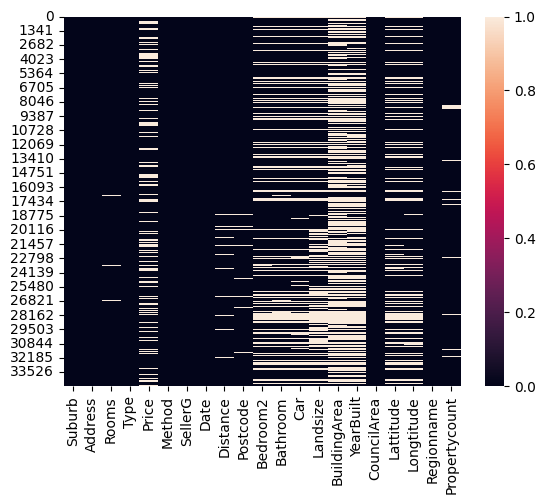

In [12]:
sns.heatmap(data.isnull())

In [13]:
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [14]:
data.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4.0,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2.0,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2.0,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [15]:
# Fill the missing values of Bathroom and Car with mode
for column in ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt','Lattitude', 'Longtitude', 'Propertycount' ]:
    data[column].fillna(data[column].median(), inplace=True)

In [16]:
for column in ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Date']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [17]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Data Visualization

/tmp/ipykernel_32/814683819.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price']);


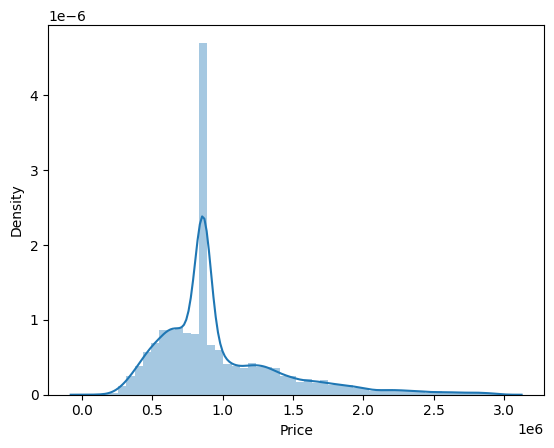

In [18]:
sns.distplot(data['Price']);

plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  float64
 3   Type           34856 non-null  object 
 4   Price          34856 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       34856 non-null  float64
 11  Bathroom       34856 non-null  float64
 12  Car            34856 non-null  float64
 13  Landsize       34856 non-null  float64
 14  BuildingArea   34856 non-null  float64
 15  YearBuilt      34856 non-null  float64
 16  CouncilArea    34856 non-null  object 
 17  Lattitude      34856 non-null  float64
 18  Longtitude 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

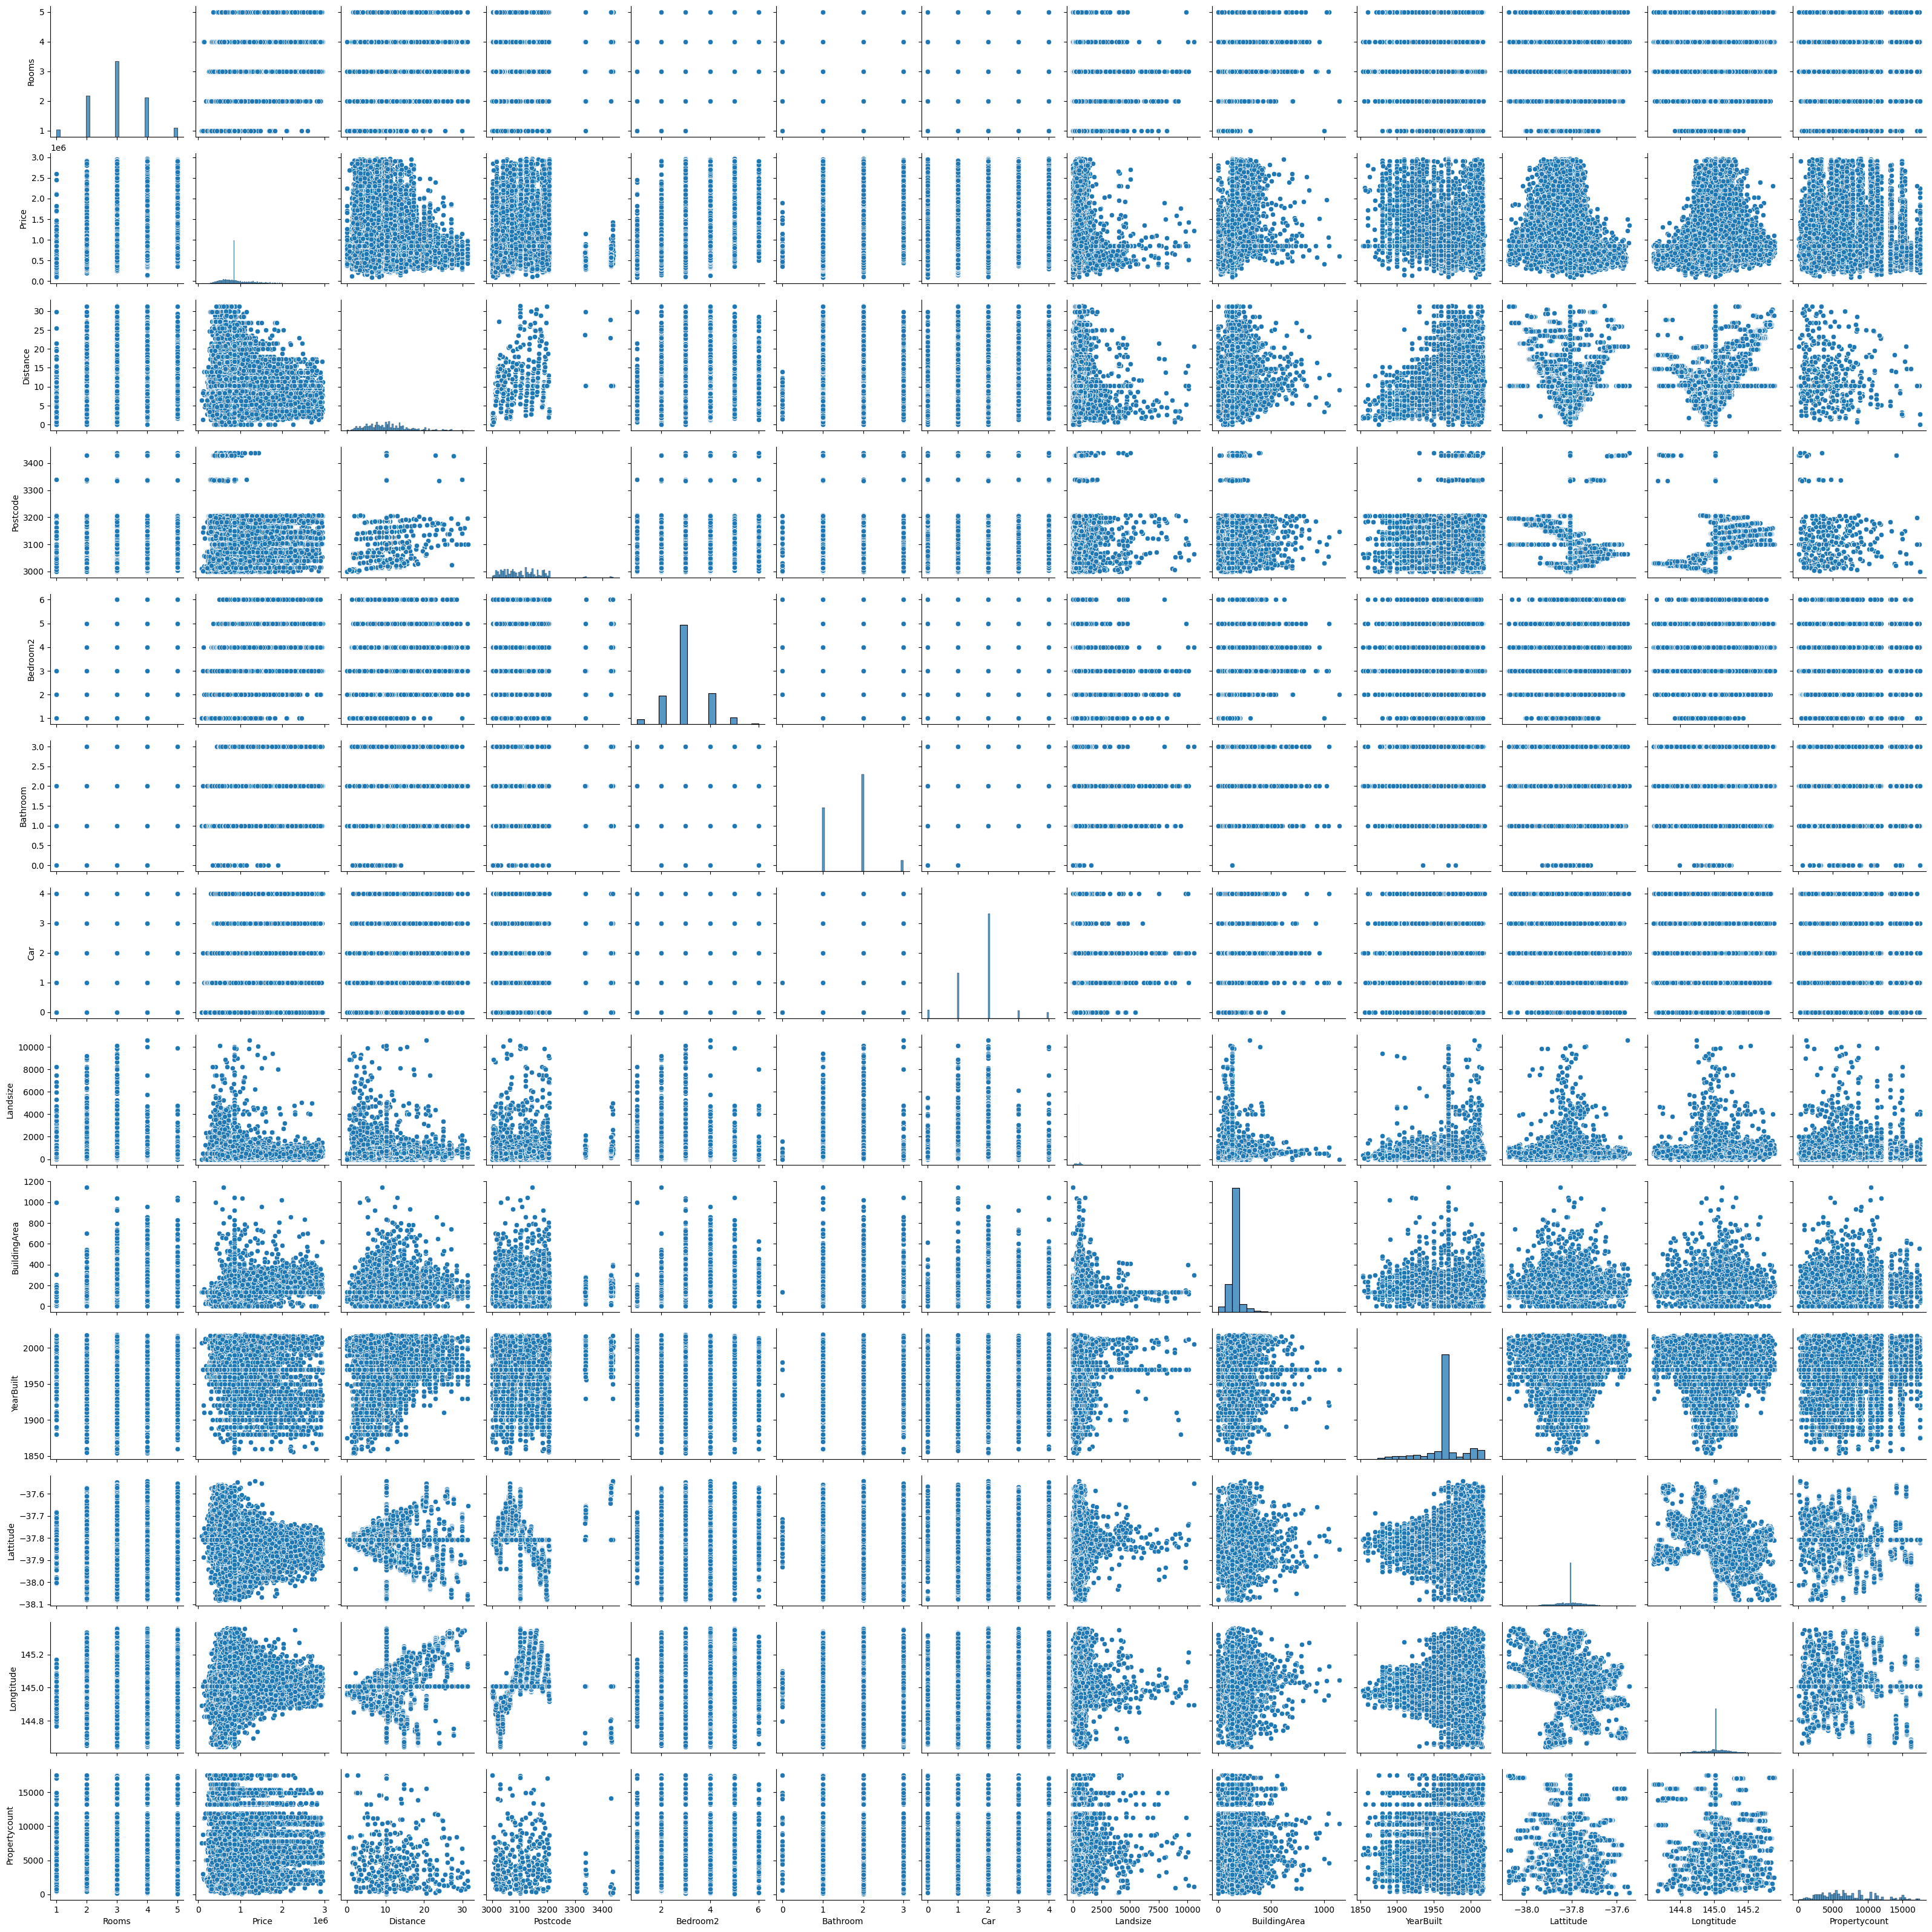

In [20]:
sns.pairplot(data, vars=['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount'])
plt.show

## Label Encoding

In [21]:

categorical_columns = data.select_dtypes(include="object").columns

le = LabelEncoder()

for i in categorical_columns:
    data[i]=le.fit_transform(data[i])

# Modeling
  

In [22]:
#sns.heatmap(data.corr(), ax=ax);
#plt.show()

## Splite Train and Test Dataset

In [23]:
#split the data into training set and validation set
X=data.drop('Price', axis=1)
y=data['Price']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20, random_state=0)

In [24]:
X_train

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
21317,190,332,3.0,0,0,23,19,25.2,3173.0,3.0,2.0,2.0,520.0,136.0,1970.0,9,-37.80660,145.00860,4,8459.0
5194,162,9867,1.0,2,2,155,64,4.6,3122.0,1.0,1.0,1.0,0.0,63.0,1995.0,2,-37.82990,145.04220,5,11308.0
16910,129,20931,3.0,0,7,23,46,7.5,3040.0,3.0,3.0,1.0,846.0,187.0,1940.0,22,-37.75228,144.88429,6,588.0
27786,142,5222,3.0,0,0,13,26,10.2,3199.0,3.0,2.0,2.0,594.0,3.0,1970.0,7,-37.80660,145.12940,4,17055.0
10422,313,22896,3.0,2,5,62,3,4.6,3142.0,3.0,2.0,2.0,520.0,136.0,1970.0,27,-37.80660,145.00860,5,7217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20758,261,14242,3.0,0,2,370,76,4.6,3181.0,3.0,1.0,0.0,435.0,200.0,1966.0,27,-37.85793,145.00734,5,7717.0
32104,275,30098,4.0,0,1,102,56,20.6,3064.0,4.0,2.0,2.0,631.0,160.0,1998.0,11,-37.62757,144.92313,2,5833.0
30404,152,5641,5.0,0,5,38,77,11.2,3046.0,5.0,3.0,2.0,909.0,342.0,1990.0,24,-37.69500,144.91038,2,8870.0
21244,159,23502,4.0,0,7,50,19,13.8,3188.0,4.0,2.0,2.0,620.0,136.0,1993.0,1,-37.93478,145.01156,5,5454.0


In [25]:
print("Total size: ", data.shape[0])
print("Train size: ", X_train.shape, y_train.shape)
print("Test size: ", X_test.shape, y_test.shape)

Total size:  34856
Train size:  (27884, 20) (27884,)
Test size:  (6972, 20) (6972,)


In [26]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
models_summary = pd.DataFrame([],
                              columns=['model_name', 
                                       'prediction_score',
                                       'mean_absolute_error'
                                      ])
models_summary

,model_name,prediction_score,mean_absolute_error


In [28]:
lr_model_predicted = lr_model.predict(X_test)
lr_model_predicted

array([ 778086.82962467, 1083370.09013265,  860619.75855416, ...,
       1190813.71559979, 1062315.6094546 ,  937354.9048373 ])

In [29]:
lr_model_score = lr_model.score(X_test, y_test )
lr_model_score

0.35305464046335877

In [30]:
mae = mean_absolute_error(y_test, lr_model_predicted)
mae

256803.62880847536